# Motion of a charge through a charged ring

In problem 2 you computed the electric field along the axis of a charged ring of radius $R$. Imagine that a charge $Q=1\,{\rm \mu C}$ of mass $m=100\,g$ is released from a point $x_0$ on the axis at time $t=0$. Compute the trajectory of the charge assuming $R=1m$ and that the ring carries the opposite charge $-Q$ up to $t=1000\,s$ for $x_0=1\,m$ and $x_0=10\,m$. 

In order to do this, we need to numerically integrate Newton's equation of motion ${\bf F}=m{\bf a}$. This is a second order ordinary differential equation. Without getting into any details about numerical methods for integrating ODEs, all of them are essentially based on a Taylor expansion in time for a small time time increment $\Delta t$. A suitable algorithm for this particular kind is the "velocity Verlet" method. Let us denote position, velocity and acceleration at time $t$ with $x(t)$, $v(t)$ and $a(t)$ then these quantities after a small time step $\Delta t$ can be obtained as follows:


$$v(t+\Delta t/2)=v(t)+ a(t)\Delta t/2$$
$$x(t+\Delta t)=x(t)+ v(t+\Delta t/2)\Delta t$$
$$v(t+\Delta t)=v(t+\Delta t/2)+ a(t+\Delta t)\Delta t/2$$

These equations are in a form that can be directly implemented in a computer program. First define all relevant constants and a function that returns the force or acceleration as a function of position $x(t)$, and initialize the position to $x(0)=x_0$ and the velocity to $v(0)=0$. Then advance $x(t)$ and $y(t)$ according to the algorithm above and store the trajectory in an array. Your answer should consist of a plot of this trajectory (position versus time) for the two initial positions given above. Comment on the differences between these trajectories. Make sure you integrate long enough to see the characteristic pattern of the motion in each case.

Hints: By considering the symmetry of the problem, you should notice that the charge moves in one dimension only. You can try out different values of the timestep $\Delta t$ (what happens qualitatively), but a possible value for the parameters given above is $\Delta t=1s$. Also, ignore gravity. If you have time, experiment with the paramenters of the problem (mass, charge, size of ring, etc.)

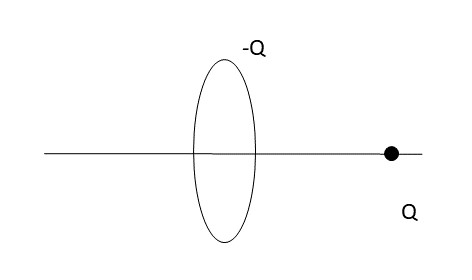


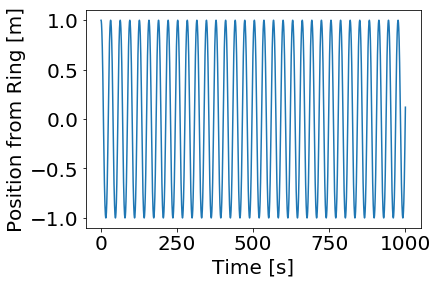

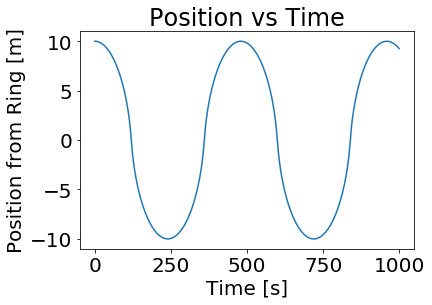

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import rcParams
rcParams.update({'font.size':20}) #optional to change default font size

# define constants
k=9e9
q = 1e-06
R = 1
m = 0.1
x0 = 1
v0 = 0
dt = 0.1
n = 1000/dt
# set up arrays for position and time

# define a function that returns the force or acceleration
def acc(j):
    f = -(k*j*(q**2))/((j**2)+(R**2))**(1.5)
    a = f/m
    return a

# set initial position and velocity
xp = [x0] #xpath
vp = [v0] #vpath
ap = [acc(xp[0])]#apath
tpath = [0]


# integrate equation of motion
def func():
    vhalf = vp[-1]+ap[-1]*dt/2 # first equation
    xp.append(xp[-1]+vhalf*dt)
    ap.append(acc(xp[-1]))
    vp.append(vhalf + ap[-1]*dt/2)
    
    
def recurs():
    for i in range(int(n)):
        call = func()
        tpath.append(tpath[0]+(i+1)*dt)

call1 = recurs()

# plot trajectories
plt.figure(1)
#plt.figure(figsize=(6,6))
plt.plot(tpath,xp)
plt.xlabel("Time [s]")
plt.ylabel("Position from Ring [m]")

x0=10
xp = [x0]
vp = [v0]
ap = [acc(xp[0])]
tpath = [0]

call2 = recurs()

plt.figure(2)
#plt.figure(figsize=(6,6))
plt.plot(tpath,xp)
plt.title("Position vs Time")
plt.xlabel("Time [s]")
plt.ylabel("Position from Ring [m]")
plt.show()

#SOMETIMES JUPYTER DOESN'T SHOW PLOTS. IT DOES SHOW THE PLOTS IN SPYDER, HOWEVER, EVERYTIME. I WILL ATTACH THE SPYDER FILE AS WELL
#Sorry about the caps lock. 

#It oscillates like a cosine function, and the frequency depends on the distance from the origin. 


#Jaiten Saini helped me out on the code as I'm learning Python now, as I'm taking Phys 210 concurrently
#with Phys 301. 